In [2]:
import numpy as np
from matplotlib.pyplot import imread
from skimage.transform import resize
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

%matplotlib inline

در اینجا برای اینکه در قسمت اخر تمرین مشکل برای داده های تست جدید نداشته باشیم همه دیتا ها را نرمال کردیم 

برای اینکار اول عکس ها را به تعداد پیکسل مورد نیاز در صورت مسئله خود بردیم و بعد از ان 

اول داده های خود را به میانگین صفر بردیم


و بعد از اینکار داده های خود را نرمالسازی کردیم 

دلیل اینکار هم این است که تصاویر برای تست متفاوت نباید باشد و مدل اموزش دیده روی این داده ها اموزش دیده است 

برای نرمالسازی داده ها من از دو فرمول زیر استفاده کردم اولی برای بردن به میانگین صفر و بعدی نرمالسازی دادگان ماست 

X -= np.mean(X, axis=0)

X /= np.std(X, axis=0)

این دو راه در مقالات و سایت ها معرفی شده و راه های دیگری هم نیز بود ولی با این دو دقت مدل مشابه داده های اموزش دیده شد

مانند 
تبدیل ماتریس کووراریانس به یک ماتریس همانی
و 
تبدیل ماتریس کووراریانس به یک ماتریس قطری

در جلوتر من بدون این روش و با این روش را نشان میدهم که بدون این روش دقت مدل من سی درصد بود ولی با این دو روش دقت مدل من به هشتاد درصد رسید

به دلیل وقت کم من مدل هایی که در فایل گذاشتم با ایپوک 100 است اما در فایل پایین بعضی تعداد ایپوک به دلیل وقت کم مقدار کمی انتخاب شده اما نتایج درست است.

In [3]:
set_x_list = []
set_y_list = []

num_px = 64
classes = ("0", "1","2", "3","4","5")
for i in range(200):
    zero = "drive/MyDrive/HW02/HW/dataset/0/IMG ("+str(i)+").JPG"
    one = "drive/MyDrive/HW02/HW/dataset/1/IMG ("+str(i)+").JPG"
    two  ="drive/MyDrive/HW02/HW/dataset/2/IMG ("+str(i)+").JPG"
    three ="drive/MyDrive/HW02/HW/dataset/3/IMG ("+str(i)+").JPG"
    four ="drive/MyDrive/HW02/HW/dataset/4/IMG ("+str(i)+").JPG"
    five ="drive/MyDrive/HW02/HW/dataset/5/IMG ("+str(i)+").JPG"
    
    zero_full_image = imread(zero)
    zero_image = resize(zero_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(zero_image)
    set_y_list.append(0)
    
    one_full_image = imread(one)
    one_image = resize(one_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(one_image)
    set_y_list.append(1)
    
    two_full_image = imread(two)
    two_image = resize(two_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(two_image)
    set_y_list.append(2)
    
    three_full_image = imread(three)
    three_image = resize(three_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(three_image)
    set_y_list.append(3)
    
    four_full_image = imread(four)
    four_image = resize(four_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(four_image)
    set_y_list.append(4)
    
    five_full_image = imread(five)
    five_image = resize(five_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(five_image)
    set_y_list.append(5)

    
set_x = np.array(set_x_list)
set_y = np.array(set_y_list)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(set_x.shape)

(1200, 64, 64, 3)


In [5]:
print(set_y.shape)

(1200,)


y = 5, it's a '5' picture.


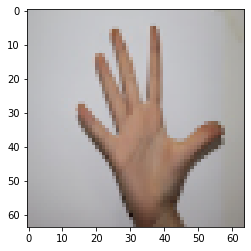

In [6]:
index = 11
plt.imshow(set_x[index])
print ("y = " + str(set_y[index,]) + ", it's a '" + classes[np.squeeze(set_y[index,])] +  "' picture.")

In [7]:
num_pixels = set_x.shape[1] * set_x.shape[2] *set_x.shape[3]
set_x =set_x.reshape(set_x.shape[0], num_pixels).astype('float32')
set_y =set_y.reshape(set_y.shape[0],1).astype('float32')

In [8]:
set_x.shape

(1200, 12288)

In [9]:
set_y.shape

(1200, 1)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
set_x -= np.mean(set_x, axis=0)

In [12]:
set_x /= np.std(set_x, axis=0)

In [13]:
set_x.shape

(1200, 12288)

In [14]:
set_y

array([[0.],
       [1.],
       [2.],
       ...,
       [3.],
       [4.],
       [5.]], dtype=float32)

In [15]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [16]:
import os
import string
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import IPython

%matplotlib inline

In [17]:
X_train, X_test, y_train, y_test = train_test_split(set_x,set_y, test_size=0.1, random_state=42)

In [18]:
X_train.shape

(1080, 12288)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
34/34 [==============================] - 4s 57ms/step - loss: 7.6483 - accuracy: 0.3194
Epoch 2/100
34/34 [==============================] - 2s 54ms/step - loss: 0.9745 - accuracy: 0.6343
Epoch 3/100
34/34 [==============================] - 2s 54ms/step - loss: 0.6649 - accuracy: 0.7713
Epoch 4/100
34/34 [==============================] - 2s 53ms/step - loss: 0.4831 - accuracy: 0.8352
Epoch 5/100
34/34 [==============================] - 2s 53ms/step - loss: 0.3994 - accuracy: 0.8713
Epoch 6/100
34/34 [==============================] - 2s 54ms/step - loss: 0.3339 - accuracy: 0.9009
Epoch 7/100
34/34 [==============================] - 2s 54ms/step - loss: 0.2751 - accuracy: 0.9130
Epoch 8/100
34/34 [==============================] - 2s 54ms/step - loss: 0.2343 - accuracy: 0.9296
Epoch 9/100
34/34 [==============================] - 2s 54ms/step - loss: 0.1867 - accuracy: 0.9528
Epoch 10/100
34/34 [==============================] - 2s 53ms/step - loss: 0.2128 - accuracy: 0.9389

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              50335744  
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_3 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_5 (Dense)             (None, 6)                 24582     
                                                                 
Total params: 117,485,574
Trainable params: 117,485,574


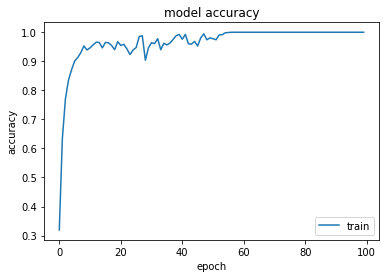

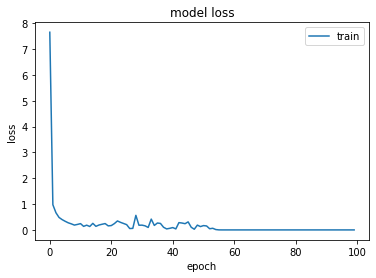

In [ ]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode20.h5")

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedMode20.h5")

In [ ]:
result = loaded_model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 19ms/step - loss: 3.7538 - accuracy: 0.8750
Test Loss 3.753805637359619
Test Accuracy 0.875


در اینجا دیدیم با یه مدل پیچیده با اینکه روی داده اموزشی ما خیلی خوب پاسخ داد اما در مدل تست دقت پایین تری را دارد بنابراین این مدل دچار بیش برازش شده 
دلیل ان این است شبکخ بسیار پیچیده است در حالی که داده به ان اندازه نداریم  
سه مدل دیگر که دارای بیش برازش هست در فایل پیوست مدل ارسال شده است.

همانطور که میبیننید در ایپوک های مختلف دقت در مدل اموزش بیشتر میشود ولی دقت در داده تست خیلی کم افزایش می یابد و ار یه حدی بالاتر نمی رود

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train,  epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7772 - accuracy: 0.1870
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7387 - accuracy: 0.2296
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7193 - accuracy: 0.2694
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7059 - accuracy: 0.2880
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 1.6965 - accuracy: 0.3019
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6883 - accuracy: 0.3241
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6813 - accuracy: 0.3222
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6752 - accuracy: 0.3333
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6691 - accuracy: 0.3306
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6636 - accuracy: 0.3361
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 12289     
                                                                 
 dense_11 (Dense)            (None, 6)                 12        
                                                                 
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
_________________________________________________________________


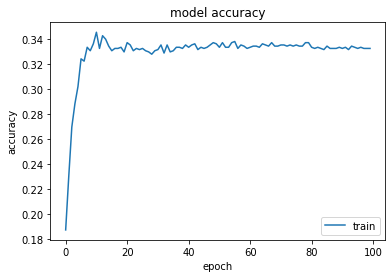

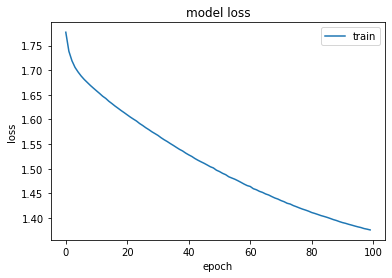

In [ ]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode23.h5")

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedMode23.h5")

In [ ]:
result = loaded_model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 5ms/step - loss: 1.5876 - accuracy: 0.2667
Test Loss 1.5875526666641235
Test Accuracy 0.2666666805744171


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 16, epochs = 5)

Epoch 1/5
68/68 [==============================] - 3s 38ms/step - loss: 2.3271 - accuracy: 0.1657
Epoch 2/5
68/68 [==============================] - 3s 37ms/step - loss: 2.1943 - accuracy: 0.1815
Epoch 3/5
68/68 [==============================] - 2s 37ms/step - loss: 2.0437 - accuracy: 0.2324
Epoch 4/5
68/68 [==============================] - 2s 37ms/step - loss: 1.9585 - accuracy: 0.2435
Epoch 5/5
68/68 [==============================] - 3s 37ms/step - loss: 1.8822 - accuracy: 0.3046


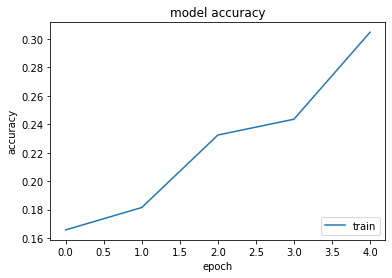

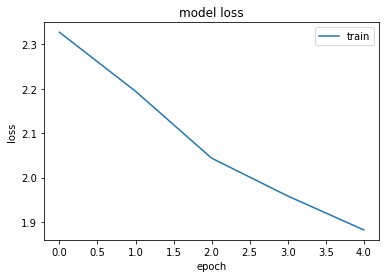

In [ ]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 15ms/step - loss: 1.4524 - accuracy: 0.4917
Test Loss 1.452392816543579
Test Accuracy 0.49166667461395264


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedModel35.h5")

در پنج مدلی که به پیوست ارسال شئه نشان داده شده چون مدل ما بسیار ساده تر از داده های ما بوده پاسخ گو نیست و مدل ما کم برازش است و پاسخ گو نیست و هر چه داده های خود را برای اموزش بگذاریم با دقت خوبی به دست نمیاورد و گاهی دقت روی داده های اموزشی پایین تر از دقت روی داده های تست ماست برای حل این مشکل باید شبکه خود را پیچیده تر کنیم و بهترین وزن را انتخاب کنیم

همانطور که میبینید دقت در مدل اموزش کمتر از مدل تست شده 

حال برای حل مشکل بیش برازش ما یا باید تعداد داده اموزشی خود را افزایش دهیم که گاه داده های ولید کمک میکند و چون اینجا داده ولید نداریم باید با کمک هایپر پارامتر ها این مشکل را حل کنیم 
در اینجا با تغییر میزان نرخ یادگیری و تنظیم سعی در پیدا کردن مدلی خواهیم بود که هم روی تست و هم روی داده اموزشی دقت خوبی بدهد و تفاوت را کم کند و زیر 5-6 برساند

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
#optimizer = SGD(lr=0.01, momentum=momentum)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 2s 57ms/step - loss: 0.2263 - accuracy: 0.9361
Epoch 2/30
34/34 [==============================] - 2s 55ms/step - loss: 0.3446 - accuracy: 0.9269
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 0.4904 - accuracy: 0.8870
Epoch 4/30
34/34 [==============================] - 2s 55ms/step - loss: 0.4448 - accuracy: 0.9065
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 0.3955 - accuracy: 0.9148
Epoch 6/30
34/34 [==============================] - 2s 56ms/step - loss: 0.3050 - accuracy: 0.9139
Epoch 7/30
34/34 [==============================] - 2s 55ms/step - loss: 0.3016 - accuracy: 0.9259
Epoch 8/30
34/34 [==============================] - 2s 55ms/step - loss: 0.4000 - accuracy: 0.9157
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 0.2373 - accuracy: 0.9500
Epoch 10/30
34/34 [==============================] - 2s 54ms/step - loss: 0.3941 - accuracy: 0.9139
Epoch 11/

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 21ms/step - loss: 1.3045 - accuracy: 0.8417
Test Loss 1.3045008182525635
Test Accuracy 0.8416666388511658


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 56ms/step - loss: 10.0362 - accuracy: 0.2083
Epoch 2/30
34/34 [==============================] - 2s 54ms/step - loss: 1.7455 - accuracy: 0.3370
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.2793 - accuracy: 0.4778
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.1204 - accuracy: 0.5639
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9388 - accuracy: 0.6602
Epoch 6/30
34/34 [==============================] - 2s 53ms/step - loss: 0.8225 - accuracy: 0.7213
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7880 - accuracy: 0.7324
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.6641 - accuracy: 0.7667
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7269 - accuracy: 0.7796
Epoch 10/30
34/34 [==============================] - 2s 53ms/step - loss: 0.6796 - accuracy: 0.7880
Epoch 11

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 19ms/step - loss: 0.8278 - accuracy: 0.7750
Test Loss 0.8278408646583557
Test Accuracy 0.7749999761581421


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.52),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.52),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.52),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.52),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 57ms/step - loss: 11.7725 - accuracy: 0.2093
Epoch 2/30
34/34 [==============================] - 2s 54ms/step - loss: 1.8152 - accuracy: 0.3380
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.3451 - accuracy: 0.4481
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.1035 - accuracy: 0.5778
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9430 - accuracy: 0.6306
Epoch 6/30
34/34 [==============================] - 2s 55ms/step - loss: 0.8122 - accuracy: 0.7065
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7249 - accuracy: 0.7509
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7402 - accuracy: 0.7565
Epoch 9/30
34/34 [==============================] - 2s 55ms/step - loss: 0.6267 - accuracy: 0.7870
Epoch 10/30
34/34 [==============================] - 2s 54ms/step - loss: 0.5387 - accuracy: 0.8278
Epoch 11

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 20ms/step - loss: 1.5886 - accuracy: 0.8167
Test Loss 1.5886300802230835
Test Accuracy 0.8166666626930237


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode25.h5")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.522),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.522),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.522),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.522),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 22s 56ms/step - loss: 10.2090 - accuracy: 0.1991
Epoch 2/30
34/34 [==============================] - 2s 54ms/step - loss: 1.8615 - accuracy: 0.3222
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.3943 - accuracy: 0.4676
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.0697 - accuracy: 0.6028
Epoch 5/30
34/34 [==============================] - 2s 56ms/step - loss: 1.0014 - accuracy: 0.6269
Epoch 6/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9006 - accuracy: 0.6907
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7704 - accuracy: 0.7287
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7359 - accuracy: 0.7565
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 0.5929 - accuracy: 0.8028
Epoch 10/30
34/34 [==============================] - 2s 54ms/step - loss: 0.5621 - accuracy: 0.8185
Epoch 1

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 17ms/step - loss: 1.4588 - accuracy: 0.8000
Test Loss 1.45875883102417
Test Accuracy 0.800000011920929


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 57ms/step - loss: 12.3453 - accuracy: 0.1954
Epoch 2/30
34/34 [==============================] - 2s 54ms/step - loss: 2.2161 - accuracy: 0.2648
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.6054 - accuracy: 0.3907
Epoch 4/30
34/34 [==============================] - 2s 53ms/step - loss: 1.3510 - accuracy: 0.4954
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 1.1403 - accuracy: 0.5935
Epoch 6/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9583 - accuracy: 0.6389
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9291 - accuracy: 0.6602
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.8676 - accuracy: 0.6954
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7705 - accuracy: 0.7491
Epoch 10/30
34/34 [==============================] - 2s 54ms/step - loss: 0.7182 - accuracy: 0.7546
Epoch 11

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 18ms/step - loss: 1.1971 - accuracy: 0.8333
Test Loss 1.19706130027771
Test Accuracy 0.8333333134651184


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode26.h5")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 56ms/step - loss: 25.2633 - accuracy: 0.1602
Epoch 2/30
34/34 [==============================] - 2s 53ms/step - loss: 2.8839 - accuracy: 0.2157
Epoch 3/30
34/34 [==============================] - 2s 55ms/step - loss: 2.0963 - accuracy: 0.2296
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.8581 - accuracy: 0.2815
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 1.7206 - accuracy: 0.3444
Epoch 6/30
34/34 [==============================] - 2s 54ms/step - loss: 1.6478 - accuracy: 0.3630
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 1.5154 - accuracy: 0.3963
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 1.4615 - accuracy: 0.4250
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 1.3606 - accuracy: 0.4694
Epoch 10/30
34/34 [==============================] - 2s 53ms/step - loss: 1.3029 - accuracy: 0.4806
Epoch 11

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.61),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.61),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.61),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.61),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 57ms/step - loss: 13.6333 - accuracy: 0.1546
Epoch 2/30
34/34 [==============================] - 2s 54ms/step - loss: 2.4836 - accuracy: 0.2148
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.7497 - accuracy: 0.3306
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.5706 - accuracy: 0.4148
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 1.3440 - accuracy: 0.4889
Epoch 6/30
34/34 [==============================] - 2s 53ms/step - loss: 1.1511 - accuracy: 0.5611
Epoch 7/30
34/34 [==============================] - 2s 54ms/step - loss: 1.1021 - accuracy: 0.6130
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9230 - accuracy: 0.6722
Epoch 9/30
34/34 [==============================] - 2s 53ms/step - loss: 0.8703 - accuracy: 0.6833
Epoch 10/30
34/34 [==============================] - 2s 53ms/step - loss: 0.9000 - accuracy: 0.7083
Epoch 11

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 20ms/step - loss: 0.9572 - accuracy: 0.7667
Test Loss 0.9572386145591736
Test Accuracy 0.7666666507720947


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode27.h5")

همانطور که مشاهده میکنید در 5 مدل که تست شده دقت در داده اموزشی ما کمتر از داده تست ما شده و دلیل این است که مدل کم برازش است یعنی به اندازه کافی مدل اموزش داده نشده 

In [ ]:
#predicted

In [ ]:
y_test.shape

(120, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
34/34 [==============================] - 3s 56ms/step - loss: 21.4434 - accuracy: 0.1861
Epoch 2/30
34/34 [==============================] - 2s 53ms/step - loss: 1.9236 - accuracy: 0.2722
Epoch 3/30
34/34 [==============================] - 2s 54ms/step - loss: 1.6830 - accuracy: 0.3481
Epoch 4/30
34/34 [==============================] - 2s 54ms/step - loss: 1.4730 - accuracy: 0.3981
Epoch 5/30
34/34 [==============================] - 2s 54ms/step - loss: 1.3645 - accuracy: 0.4889
Epoch 6/30
34/34 [==============================] - 2s 54ms/step - loss: 1.1725 - accuracy: 0.5509
Epoch 7/30
34/34 [==============================] - 2s 53ms/step - loss: 1.0584 - accuracy: 0.5889
Epoch 8/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9940 - accuracy: 0.6491
Epoch 9/30
34/34 [==============================] - 2s 54ms/step - loss: 0.9228 - accuracy: 0.6704
Epoch 10/30
34/34 [==============================] - 2s 53ms/step - loss: 0.8481 - accuracy: 0.7065
Epoch 11

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 18ms/step - loss: 1.1372 - accuracy: 0.7833
Test Loss 1.1371901035308838
Test Accuracy 0.7833333611488342


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedMode28.h5")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
34/34 [==============================] - 2s 41ms/step - loss: 1.8996 - accuracy: 0.4583
Epoch 2/5
34/34 [==============================] - 1s 38ms/step - loss: 1.4290 - accuracy: 0.6787
Epoch 3/5
34/34 [==============================] - 1s 38ms/step - loss: 1.1690 - accuracy: 0.7611
Epoch 4/5
34/34 [==============================] - 1s 38ms/step - loss: 1.1572 - accuracy: 0.7870
Epoch 5/5
34/34 [==============================] - 1s 37ms/step - loss: 1.0402 - accuracy: 0.8139


In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 13ms/step - loss: 1.1342 - accuracy: 0.7667
Test Loss 1.1341583728790283
Test Accuracy 0.7666666507720947


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedModel36.h5")

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.65),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.65),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
34/34 [==============================] - 2s 38ms/step - loss: 20.9312 - accuracy: 0.3815
Epoch 2/5
34/34 [==============================] - 1s 38ms/step - loss: 2.9699 - accuracy: 0.6037
Epoch 3/5
34/34 [==============================] - 1s 38ms/step - loss: 1.6962 - accuracy: 0.6722
Epoch 4/5
34/34 [==============================] - 1s 38ms/step - loss: 1.4879 - accuracy: 0.7324
Epoch 5/5
34/34 [==============================] - 1s 38ms/step - loss: 1.0307 - accuracy: 0.7602


In [ ]:
result = model.evaluate(X_test, y_test)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

4/4 [==============================] - 0s 13ms/step - loss: 0.6159 - accuracy: 0.7333
Test Loss 0.6159108281135559
Test Accuracy 0.7333333492279053


In [ ]:
model.save("/content/drive/MyDrive/HW02/HW/TrainedModel37.h5")

با تغییر هایپرپارامترها سعی در پیداکردن مقادیری شدیم که بیش برازش را از بین ببریم و دقت را در هر دو برای هر ایپوک به یک حد افزایش یابد 

ابرپارامترهایی که باید برای آن مقدار تعیین نمود :

ساختار شبکه یعنی تعداد و اندازه لایه ها

نرخ یادگیری ، چگونگی کاهش آن و قاعده به روزرسانی

چگونگی تنظیم و شدت تنظیم

با تغییر این پارامترها و پیدا کردن بهترین انها برای داده هایی که داریم می توانیم به بهترین مدل دست پیدا کنیم

نکته:در اینجا دیدیم اگر از بچ نرم استفاده کنیم میتوان نرخ یادگیری بزرگ هم در نظر بگیریم

برای تعیین این مقادیر درست کاری که باید حتما انجام دهیم و از خروجی های بالا ما هم انجام دادیم این است که در طول آموزش مقدار تابع لاس را رسم کنیم و لاسی خوب است که اوایل با شیب زیادی کم میشود و هر چه میگذرد یواش یواش کم میشود 

در اینجا سه مدل ساختیم که دقت مدل در داده اموزشی و تست اختلاف چندانی نداشتند و هر دو خوب بودند و اگر ادامه بدهیم هر دو بیشتر میشوند بنابراین باید ایپوک های بیشتری را انجام بدهیم می توان لایه و وزن را زیاد کرد اما به دلیل وقت کم ادامه ندادیم برای تحویل حضوری خروجی مجدد میگیرم و ارائه میدهم

پایانی:مدل بیش برازش شده خود را یا باید داده جدید اضافه کنیم اگر نمیشد این مدل چون خو مجمعه اموزشی را به دلیل پیچیدگی زیاد مدل خیلی خوب یاد گرفته است و در ایپوک کم در مدل اموزشی به دقت 100 رسیدیم ولی داده های مجموعه تست اصلا خوب پیش بینی نمیشود یعنی در هر تکرار خیلی افزایش چندانی نداریم پس هر چه شبکه بزرگتر و قوی تر باشد به شبکه های قدرتمند تری نیاز داریم و برای تنظیم ان از دراپ اوت و موارد دیگر استفاده میکنیم.

In [135]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedModel30.h5")

In [136]:
from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         0.0       0.71      0.88      0.79        17
         1.0       0.70      0.82      0.76        17
         2.0       0.58      0.71      0.64        21
         3.0       0.89      0.74      0.81        23
         4.0       0.88      0.65      0.75        23
         5.0       0.94      0.84      0.89        19

    accuracy                           0.77       120
   macro avg       0.78      0.78      0.77       120
weighted avg       0.79      0.77      0.77       120



In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.65      0.73        17
         1.0       1.00      0.76      0.87        17
         2.0       0.57      1.00      0.72        21
         3.0       0.88      0.61      0.72        23
         4.0       0.56      0.65      0.60        23
         5.0       1.00      0.74      0.85        19

    accuracy                           0.73       120
   macro avg       0.81      0.73      0.75       120
weighted avg       0.79      0.73      0.74       120



در این قسمت از ما خواسته شده 5 مقدار برای نرخ یادگیری قرار دهیم و گزارش دهیم

learn_rate = [0.00001,0.0001, 0.001, 0.01, 0.1]

در اینجا فهمیدیم هر چه بیشتر بگذاریم قدم های تابع لاس ما زیاد میشود و اگر خیلیل بیش از حد باشد از جواب بهینه دور میشویم اگر عدد را یک بگذاریم بینهایت میشود 

عدد باز خیلی کوچکتر باشد خیلی لاس کم کاهش میابد و خیلی دیر دقت بهتر میشود 

به طور کلی از این بخش اینها را فهمیدیم:
نرخ یادگیری کم: در نرخ یادگیری کم در هر تکرار چون کمتر پایین میرویم شیب کاهش کمتر میشود یعنی در نهایت ممکن است به نقطه بهینه برسیم ولی بعد از تکرار های خیلی زیاد

نرخ یادگیری زیاد: اگر زیاد در نظر بگیریم اوایل یک شیب خیلی خوبی داریم ولی یک جایی میرسد که خیلی زود  همگرا میشود و در یک بهینه محلی بد گیر میکند. 


نرخ یادگیری خیلی زیاد:اگر خیلی زیاد باشد نه تنها الگوریتم کم نمیشود و به سمت بهینه حرکت نمیکند بلکه دور میشویم و در هر تکرار مقدار لاس ما هی بیشتر و بیشتر می شود.

برای تعیین درست نرخ یادگیری در مقالات از یک استراتژی به اسم استراتژی درشت به ریز استفاده میشود

ببه این صورت است که اول شروع با یک بازه بزرگ جستجو و سپس محدود کردن این بازه به صورت مکرر است 

یعنی تعداد ایپوک یا همان تکرار را کم در نظر ببگیریم تا بتوانیم یک مقدار تقریبی برای نرخ یادگیری به دست آوریم بعد که حدودی پیدا کردیم مقدار ایپوک را بیشتر میکنیم و جستجوی دقیق تری را به دست می آوریم.

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [55]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
history=model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 2.0847 - accuracy: 0.1944
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 2.0639 - accuracy: 0.1926
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 2.0441 - accuracy: 0.1944
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 2.0251 - accuracy: 0.1991
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 2.0072 - accuracy: 0.2009
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9898 - accuracy: 0.2074
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9734 - accuracy: 0.2102
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9576 - accuracy: 0.2093
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9424 - accuracy: 0.2139
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9277 - accuracy: 0.2148


همانطور که میبینید مقدار تابع لاس خیلی کم تغییر میکند و برای جواب بهینه به تعداد تکرار بیشتر نیاز است

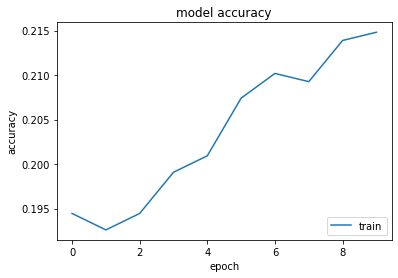

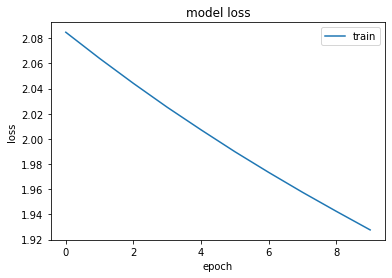

In [57]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])


In [59]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
history=model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 1.9697 - accuracy: 0.2037
Epoch 2/10
34/34 [==============================] - 0s 5ms/step - loss: 1.8272 - accuracy: 0.2519
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 1.7193 - accuracy: 0.2861
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 1.6341 - accuracy: 0.3315
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 1.5644 - accuracy: 0.3639
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 1.5048 - accuracy: 0.4046
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 1.4535 - accuracy: 0.4278
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 1.4080 - accuracy: 0.4472
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 1.3685 - accuracy: 0.4722
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 1.3329 - accuracy: 0.4824


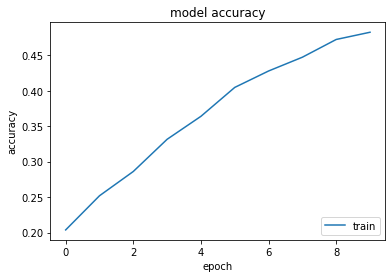

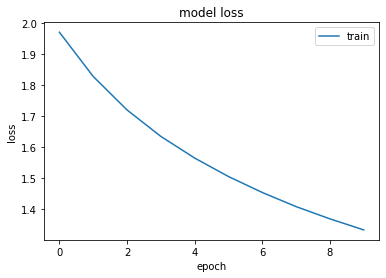

In [61]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [63]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
history=model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 1s 4ms/step - loss: 1.6468 - accuracy: 0.3750
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 1.2792 - accuracy: 0.5037
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 1.1108 - accuracy: 0.5815
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 1.0033 - accuracy: 0.6231
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.9210 - accuracy: 0.6546
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 0.8516 - accuracy: 0.6907
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.7903 - accuracy: 0.7222
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 0.7386 - accuracy: 0.7417
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.7667
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.7861


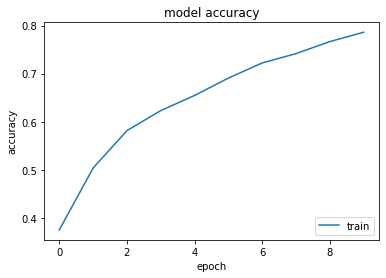

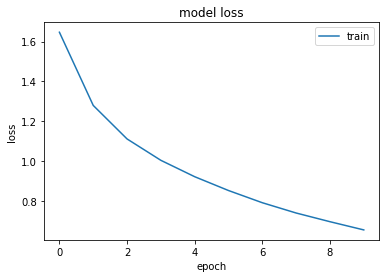

In [65]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [67]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
history=model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 1.2434 - accuracy: 0.5769
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.8361
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.9037
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.9296
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.9509
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0.9657
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9713
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9778
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9806
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9870


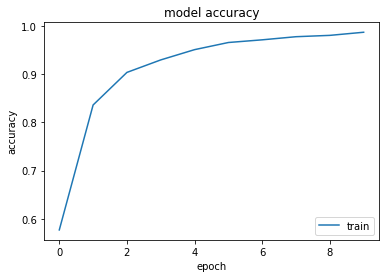

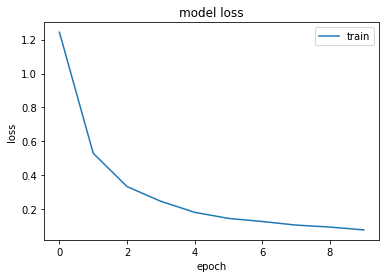

In [69]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

مقادیری که تا اینجا انتخاب کردم سعی کردم این همگرایی را بهترین نشان دهید میبینید تا اینجا مقادیر نخ یادگیری کم بود و در این مورد همان مورد مورد انتظار ما برای کاهش تابع لاس بود اول با یک شیب زیاد و بعد ملایم 

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [71]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
history=model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
34/34 [==============================] - 0s 4ms/step - loss: 28.7852 - accuracy: 0.3352
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 129.8577 - accuracy: 0.4222
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 2286.4536 - accuracy: 0.3787
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 9290.5850 - accuracy: 0.4222
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 149869.5938 - accuracy: 0.3806
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 2851692.5000 - accuracy: 0.3546
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 88605680.0000 - accuracy: 0.3750
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 197430624.0000 - accuracy: 0.4556
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 650576448.0000 - accuracy: 0.5435
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 18

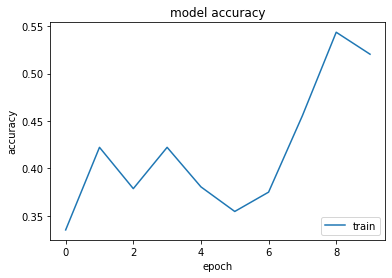

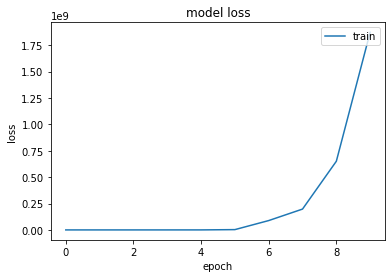

In [73]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

میبینید همانطور که گفتیم نرخ یادگیری خیلی زیاد نه تنها باعث همگرایی نشد بلکه تابع لاس ما خیلی زیاد شد

در این قسمت از ما خواسته شده 5 مقدار برای مینی بچ در نظر بگیریم و همگرایی را تحقیق کنیم 

دیدیم که خیلی خیلی باعث بهبود میشود و باعث میشود اموزش دادن مدل اموزشی راحت تر باشد و سریع تر همچنین مقادیر زیاد نرخ یادگیری را کنترل کند

به طور کلی دلیل استفاده از ان این است که هر قدم ما خیلی طول میکشد به همین خاطر می ایند مجموعه اموزشی را تیکه تیکه میکنند 

انتخاب ان هم این است که به حجم جی پی یو بستگی دارد.

batch_size = [ 1, 5, 32, 64, 128 , 200]

برای این مقادیر همگرایی را بررسی میکنیم

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [84]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
history=model.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
1080/1080 [==============================] - 3s 3ms/step - loss: 34357560.0000 - accuracy: 0.2833
Epoch 2/5
1080/1080 [==============================] - 3s 3ms/step - loss: 21752207615459328.0000 - accuracy: 0.2593
Epoch 3/5
1080/1080 [==============================] - 3s 3ms/step - loss: 7355525060162727629029376.0000 - accuracy: 0.2694
Epoch 4/5
1080/1080 [==============================] - 3s 3ms/step - loss: 3557899712998088251003415627300864.0000 - accuracy: 0.2417
Epoch 5/5
1080/1080 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.2204


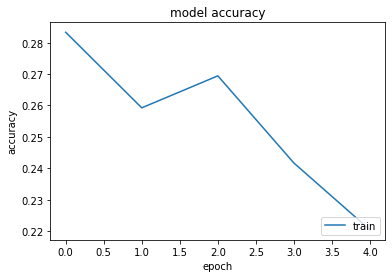

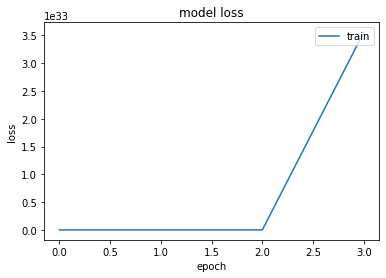

In [86]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [111]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [112]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [113]:
history=model.fit(X_train, y_train, batch_size = 5, epochs = 5)

Epoch 1/5
216/216 [==============================] - 1s 3ms/step - loss: 1.3794 - accuracy: 0.6583
Epoch 2/5
216/216 [==============================] - 1s 3ms/step - loss: 0.3648 - accuracy: 0.8583
Epoch 3/5
216/216 [==============================] - 1s 3ms/step - loss: 0.2367 - accuracy: 0.9204
Epoch 4/5
216/216 [==============================] - 1s 3ms/step - loss: 0.1164 - accuracy: 0.9565
Epoch 5/5
216/216 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9769


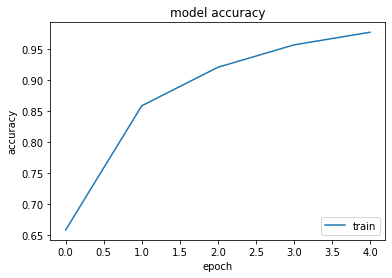

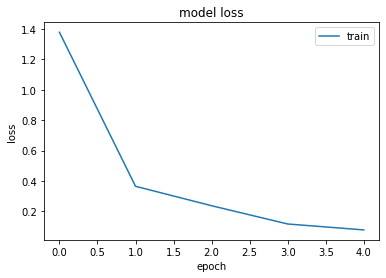

In [114]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [100]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
34/34 [==============================] - 0s 4ms/step - loss: 1.1768 - accuracy: 0.5694
Epoch 2/5
34/34 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.8454
Epoch 3/5
34/34 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.9139
Epoch 4/5
34/34 [==============================] - 0s 5ms/step - loss: 0.2371 - accuracy: 0.9259
Epoch 5/5
34/34 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.9565


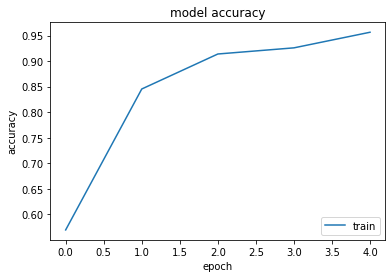

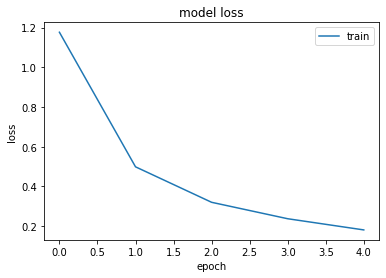

In [102]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [104]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:
history=model.fit(X_train, y_train, batch_size = 64, epochs = 5)

Epoch 1/5
17/17 [==============================] - 0s 5ms/step - loss: 1.5251 - accuracy: 0.4694
Epoch 2/5
17/17 [==============================] - 0s 5ms/step - loss: 0.7618 - accuracy: 0.6963
Epoch 3/5
17/17 [==============================] - 0s 5ms/step - loss: 0.5409 - accuracy: 0.8287
Epoch 4/5
17/17 [==============================] - 0s 5ms/step - loss: 0.4009 - accuracy: 0.8963
Epoch 5/5
17/17 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.9287


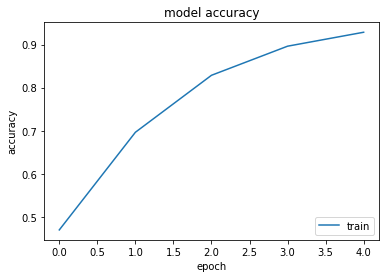

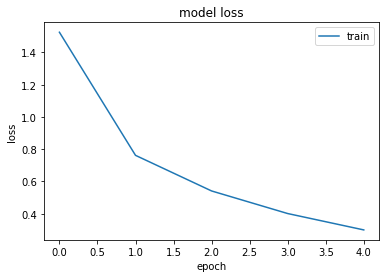

In [106]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6)
])

In [108]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [109]:
history=model.fit(X_train, y_train, batch_size = 128, epochs = 5)

Epoch 1/5
9/9 [==============================] - 0s 8ms/step - loss: 1.7397 - accuracy: 0.3343
Epoch 2/5
9/9 [==============================] - 0s 6ms/step - loss: 0.9417 - accuracy: 0.6204
Epoch 3/5
9/9 [==============================] - 0s 6ms/step - loss: 0.7133 - accuracy: 0.7056
Epoch 4/5
9/9 [==============================] - 0s 6ms/step - loss: 0.5830 - accuracy: 0.7722
Epoch 5/5
9/9 [==============================] - 0s 6ms/step - loss: 0.4964 - accuracy: 0.8463


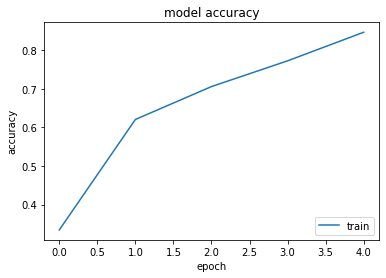

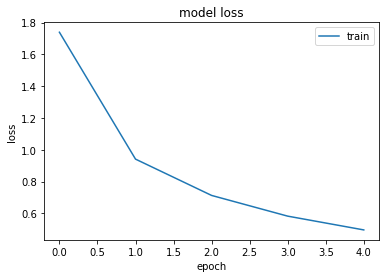

In [110]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

همانطور که دیدید انتخاب درست سایز بچ میتواند در سرعت رسیدن به مقدار بهینه و همگرایی کمک کند 

در این سوال از ما خواسته شده 20 عکس بگیریم و مدل را تست کنیم من اول عکس بدون نرمال شده را تست میکنم تا ارزش نرمالسازی را نشان دهم بعد دقت در داده های نرمال شده را نشان میدهیم

In [115]:
set_x_list = []
set_y_list = []

num_px = 64
classes = ("0", "1","2", "3","4","5")
for i in range(3):
    zero = "drive/MyDrive/datame/0/IMG ("+str(i)+").jpeg"
    one = "drive/MyDrive/datame/1/IMG ("+str(i)+").jpeg"
    two  ="drive/MyDrive/datame/2/IMG ("+str(i)+").jpeg"
    three ="drive/MyDrive/datame/3/IMG ("+str(i)+").jpeg"
    four ="drive/MyDrive/datame/4/IMG ("+str(i)+").jpeg"
    five ="drive/MyDrive/datame/5/IMG ("+str(i)+").jpeg"
    
    zero_full_image = imread(zero)
    zero_image = resize(zero_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(zero_image)
    set_y_list.append(0)
    
    one_full_image = imread(one)
    one_image = resize(one_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(one_image)
    set_y_list.append(1)
    
    two_full_image = imread(two)
    two_image = resize(two_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(two_image)
    set_y_list.append(2)
    
    three_full_image = imread(three)
    three_image = resize(three_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(three_image)
    set_y_list.append(3)
    
    four_full_image = imread(four)
    four_image = resize(four_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(four_image)
    set_y_list.append(4)
    
    five_full_image = imread(five)
    five_image = resize(five_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(five_image)
    set_y_list.append(5)

    
se_x = np.array(set_x_list)
se_y = np.array(set_y_list)

In [116]:
print(se_x.shape)

(18, 64, 64, 3)


In [117]:
print(se_y.shape)

(18,)


In [119]:
num_pixels = se_x.shape[1] * se_x.shape[2] *se_x.shape[3]
se_x =se_x.reshape(se_x.shape[0], num_pixels).astype('float32')
se_y =se_y.reshape(se_y.shape[0],1).astype('float32')

In [122]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedModel30.h5")

In [123]:
result = loaded_model.evaluate(se_x, se_y)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

1/1 [==============================] - 0s 211ms/step - loss: 7.1848 - accuracy: 0.1667
Test Loss 7.1847710609436035
Test Accuracy 0.1666666716337204


همانطور که میبینید دقت بسار پایین است

In [124]:
set_x_list = []
set_y_list = []

num_px = 64
classes = ("0", "1","2", "3","4","5")
for i in range(3):
    zero = "drive/MyDrive/datasetme/0/IMG ("+str(i)+").jpeg"
    one = "drive/MyDrive/datasetme/1/IMG ("+str(i)+").jpeg"
    two  ="drive/MyDrive/datasetme/2/IMG ("+str(i)+").jpeg"
    three ="drive/MyDrive/datasetme/3/IMG ("+str(i)+").jpeg"
    four ="drive/MyDrive/datasetme/4/IMG ("+str(i)+").jpeg"
    five ="drive/MyDrive/datasetme/5/IMG ("+str(i)+").jpeg"
    
    zero_full_image = imread(zero)
    zero_image = resize(zero_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(zero_image)
    set_y_list.append(0)
    
    one_full_image = imread(one)
    one_image = resize(one_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(one_image)
    set_y_list.append(1)
    
    two_full_image = imread(two)
    two_image = resize(two_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(two_image)
    set_y_list.append(2)
    
    three_full_image = imread(three)
    three_image = resize(three_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(three_image)
    set_y_list.append(3)
    
    four_full_image = imread(four)
    four_image = resize(four_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(four_image)
    set_y_list.append(4)
    
    five_full_image = imread(five)
    five_image = resize(five_full_image, (num_px,num_px), anti_aliasing=True, mode='reflect')
    set_x_list.append(five_image)
    set_y_list.append(5)

    
se_x = np.array(set_x_list)
se_y = np.array(set_y_list)

In [125]:
print(se_x.shape)

(18, 64, 64, 3)


In [126]:
print(se_y.shape)

(18,)


y = 5, it's a '5' picture.


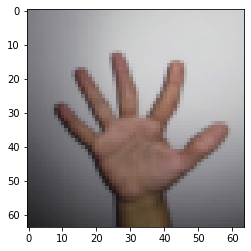

In [127]:
index = 11
plt.imshow(se_x[index])
print ("y = " + str(se_y[index,]) + ", it's a '" + classes[np.squeeze(se_y[index,])] +  "' picture.")

In [128]:
num_pixels = se_x.shape[1] * se_x.shape[2] *se_x.shape[3]
se_x =se_x.reshape(se_x.shape[0], num_pixels).astype('float32')
se_y =se_y.reshape(se_y.shape[0],1).astype('float32')

In [129]:
se_x -= np.mean(se_x, axis=0)

In [130]:
se_x /= np.std(se_x, axis=0)

In [131]:
result = loaded_model.evaluate(se_x, se_y)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

1/1 [==============================] - 0s 39ms/step - loss: 0.3565 - accuracy: 0.9444
Test Loss 0.3564562201499939
Test Accuracy 0.9444444179534912


In [134]:
result = loaded_model.evaluate(X_train, y_train)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

34/34 [==============================] - 0s 13ms/step - loss: 0.3205 - accuracy: 0.9194
Test Loss 0.3205198049545288
Test Accuracy 0.9194444417953491


In [139]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedModel31.h5")

In [140]:
result = loaded_model.evaluate(se_x, se_y)
print("Test Loss", result[0])
print("Test Accuracy", result[1])

1/1 [==============================] - 0s 161ms/step - loss: 0.6158 - accuracy: 0.8333
Test Loss 0.6158013343811035
Test Accuracy 0.8333333134651184
